# BOD 1 - Návrh zadania

## 1. Motivácia
Počasie patrí medzi najvýraznejšie faktory, ktoré vplývajú na ľudský život na Zemi. Človek sa odjakživa snažil čo najpresnejšie predpovedať počasie práve kvôli jeho veľkému vplyvu na život každého jedinca. Od predpovedi počasia sú v súčasnosti takisto závislé mnohé odvetvia, či už poľnohospodárstvo, doprava(letecká, lodná), výroba elektrickej energie (veterné elektrárne a solárne panely) a mnohé ďalšie. Z týchto dôvodov je čo najpresnejšia predpoveď počasia veľmi dôležitá.


V posledných rokoch sa začala na predpoveď počasia využívať nová technika - predpoveď pomocou neurónových sietí. Pri predpovedi počasia ide prakticky o predikciu časových radov. Kvôli premenlivosti sa počasia sa často na tieto problémy využívajú rekurentné neurónové siete.


V našom projekte sme sa rohodli zaoberať predikciou časových radov a teda predpoveďou počasia. Našim cieľom je využiť rekurentné neurónové siete. Budeme pracovať s dátami zo štyroch Amerických miest ležiacich na Juhozápade Spojených štátov:

- Los Angeles
- San Francisco
- Phoenix
- Las Vegas

## 2. Súvisiaca práca
- *Sequence to Sequence Weather Forecasting with Long Short-Term Memory Recurrent Neural Networks 2016*


V tejto práci sa autori zaoberajú predikciou počasia pre 9 miest v Maroku. Snažia sa o predpoveď teploty, vlhkosti a rýchlosti vetra na dva časové intervaly - 24 a 72 hodín. Používajú pri tom LSTM neurónové siete, ktoré patria do skupiny rekurentných neurónových sietí.

Na natrénovanie modelu neorónovej siete použili približne 15 rokov meteorologických dát, ktoré boli zaznamenané v časovom intervale jednej hodiny. Model dosiahol dobrú úspešnnosť predpovedí, porovnateľnú s úspešnosťou metód, ktoré sa na predpoveď počasia používajú v dnešnej dobe. Hodnoty sú v minutových intervaloch a zaokrúhlené na tri desatinné miesta.

Ďalšie práce v tejto oblasti:
- *An ensemble of neural networks for weather forecasting 2004*
- *An Efficient Weather Forecasting System using Artificial Neural Network 2010*
- *Weather Forecasting using Deep Learning Techniques 2015*
- *An effective weather forecasting using neural network 2014*


## 3. Dataset
Dataset obsahuje teplotu zaznamenanú vo vyššie uvedených mestách mestách v hodinových intervaloch počas obdobia jedého roka. Dokopy tak máme 35036 záznamov, 8759 pre každé mesto.

Ako bolo uvedené v analýze dát, dáta sú kompletné, neobsahujú chýbajúce hodnoty ani vychýlené hodnoty(outliery).

### Príklad dát:
![weather](./pocasiedata.png)


## 4. Návrh riešenia
Náš model sa bude skladať z viacvrstvovej rekurentnej neurónovej siete. Túto sieť budeme trénovať na vopred opísanom datasete a chceme aby predikovala teplotu a iné meteorologické dáta na pár dní dopredu.

# BOD 2 - Analýza dát

Náš vstupný dataset sa skladá z dát z troch Amerických miest:

- Los Angeles
- Phoenix
- San Francisco

Všetky tieto mestá ležia blízko pri sebe na juhozápadnom pobreží Spojených štátov čo znamená, že sa počasie v týchto mestách veľmi nelíši. Počasie je veľmi ovplyvňované Tichým oceánom.

Náš dataset obsahuje údaje o priemernej teplote(uvádzané vo Fahrenheitoch) v hodinovách intervaloch. Tieto údaje boli zozbierané počas jedného roka . Pre každé mesto máme 8759 záznamov. 

V projekte budeme pracovať na predikcií teploty.

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sea
from scipy.stats import pearsonr, spearmanr
from pandas.plotting import scatter_matrix
%matplotlib inline

## Práca s dátami

Vstupné dáta z datasetu importujeme do Pandas dataframu, ktorý využijeme na ďalšiu analýzu. Nižšie môžeme vidieť základné údaje o datasete.

In [37]:
df = pd.read_csv('../data/processed/temperatures.csv')
df.shape

(8759, 4)

In [38]:
df.head()

,DATE,LA-HLY-TEMP-NORMAL,PH-HLY-TEMP-NORMAL,SF-HLY-TEMP-NORMAL
0,01-01T01:00:00,53.3,50.0,47.4
1,01-01T02:00:00,52.3,49.1,46.9
2,01-01T03:00:00,51.5,48.2,46.5
3,01-01T04:00:00,50.8,47.5,46.0
4,01-01T05:00:00,50.4,46.8,45.9


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
DATE                  8759 non-null object
LA-HLY-TEMP-NORMAL    8759 non-null float64
PH-HLY-TEMP-NORMAL    8759 non-null float64
SF-HLY-TEMP-NORMAL    8759 non-null float64
dtypes: float64(3), object(1)
memory usage: 273.8+ KB


## Základné štatistiky

V poliach nižšie môžeme vidieť základné štatistiky o dátach ako minimálne a maximálne hodnoty, priemer, medián a iné.

Na údaji o počte riadkov môžeme vidieť, že všetky dáta v datasete sú vyplnené a dopĺňanie chýbajúcich hodnôt nebude potrebné.

V štatistikách o minimálnych a maximálnych teplotách môžeme vidieť niekoľko zaujímavých faktov. Minimálne teploty vo všetkých troch mestách sú veľmi podobné, medzi 45 a 50 Fahrenheitami. Na druhej strane, maximálne teploty sa líšia o čosi viac. Maximálna teplota vo Phoenixe je o viac ako 30 Fahrenheitov vyššia ako maximálna teplota vo zvyšných dvoch mestách. Phoenix je mesto s najnižšou minimálnou a najvyššou maximálnou teplotou, čo zároveň znamená aj najväčší rozdiel medzi minimálnou a maximálnou teplotou.

In [40]:
df.describe()

,LA-HLY-TEMP-NORMAL,PH-HLY-TEMP-NORMAL,SF-HLY-TEMP-NORMAL
count,8759.000000,8759.000000,8759.000000
mean,62.500377,75.055029,56.923621
std,5.821019,16.234063,6.108884
min,49.800000,45.200000,45.600000
25%,57.900000,61.500000,52.300000
50%,62.900000,75.100000,56.500000
75%,66.400000,88.400000,60.700000
max,75.000000,105.700000,72.200000


In [41]:
la = df['LA-HLY-TEMP-NORMAL']
ph = df['PH-HLY-TEMP-NORMAL']
sf = df['SF-HLY-TEMP-NORMAL']

In [42]:
np.median(la)

62.9

In [43]:
np.median(ph)

75.1

In [44]:
np.median(sf)

56.5

## Histogramy

V histogramoch nižšie môžeme vidieť najčastejšie a najmenej časté teploty počas roka.

Môžeme vidieť, že najčastejšie teploty v Los Angeles sa nachádzajú v rozmedzí okolo 65 Fahranheitov. Všetky teploty sú približne medzi 50 až 75 Fahrenheitami.

Teploty vo Phoenixe sú najvyššie spomedzi všetkých troch miest. Výskyt jednotlivých teplôt je rozložený rovnomernejšie. Najčastejší výskyt dosahujú teploty medzi 65 až 85 Fahrenheitami.

Distribúcia teplôt v San Franciscu je sprava zošikmená. Hodnoty teplôt sú medzi 45 až 75 Fahrenheitami a najvyšší bod je okolo 55 Fahrenheitov.

#### Los Angeles

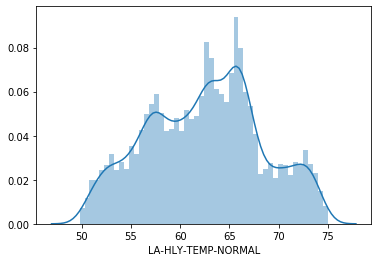

In [45]:
sea.distplot(la, bins=50)

#### Phoenix

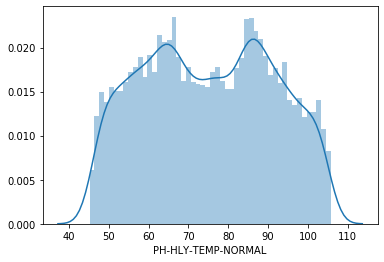

In [46]:
sea.distplot(ph, bins=50)

#### San Francisco

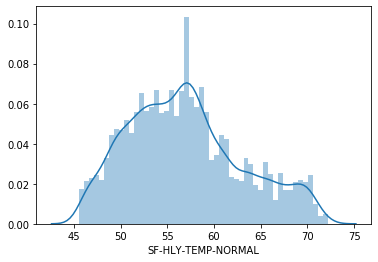

In [47]:
sea.distplot(sf, bins=50)

## Korelácie medzi premennými

V grafoch a štatistikách nižšie môžeme vidieť korelácie medzi jednotlivými premennými.

Všetky tri korelácie sú veľmi silne pozitívne s minimálnou hodnotou 0.85. Najviac pozitívna korelácia je medzi Los Angeles a San Franciscom s magnitúdou takmer 0.95.

#### Korelácia medzi Los Angeles a Phoenixom

In [48]:
np.corrcoef(la, ph)

array([[1.        , 0.86316559],
       [0.86316559, 1.        ]])

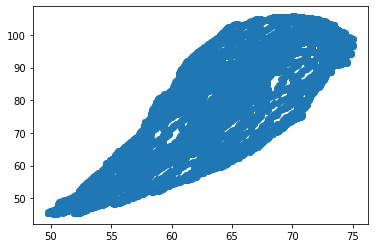

In [49]:
plt.scatter(la, ph)
plt.show()

#### Korelácia medzi Los Angeles a San Franciscom

In [50]:
np.corrcoef(la, sf)

array([[1.        , 0.94650315],
       [0.94650315, 1.        ]])

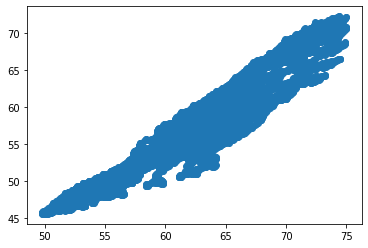

In [51]:
plt.scatter(la, sf)
plt.show()

#### Korelácia medzi San Franciscom a Phoenixom

In [52]:
np.corrcoef(sf, ph)

array([[1.        , 0.87661543],
       [0.87661543, 1.        ]])

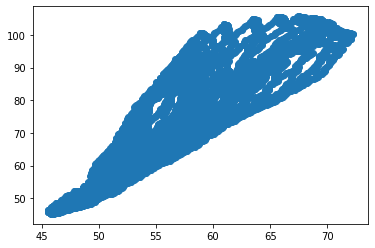

In [53]:
plt.scatter(sf, ph)
plt.show()

#### Porovnanie korelácií všetkých troch miest zároveň

In [54]:
df.corr()

,LA-HLY-TEMP-NORMAL,PH-HLY-TEMP-NORMAL,SF-HLY-TEMP-NORMAL
LA-HLY-TEMP-NORMAL,1.000000,0.863166,0.946503
PH-HLY-TEMP-NORMAL,0.863166,1.000000,0.876615
SF-HLY-TEMP-NORMAL,0.946503,0.876615,1.000000


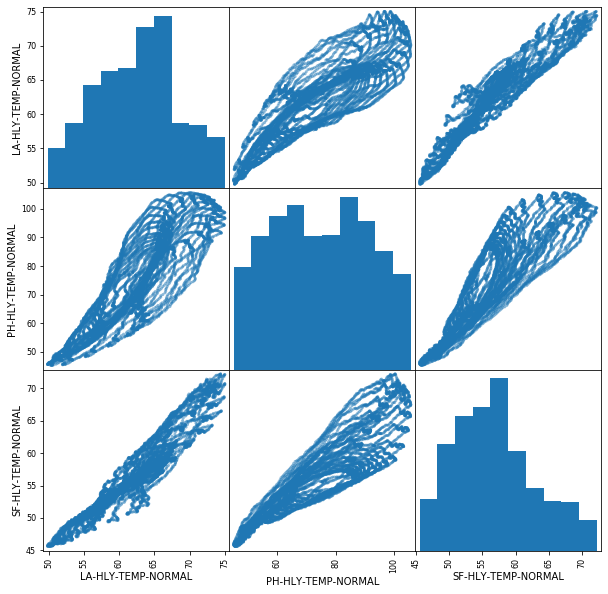

In [55]:
scatter_matrix(df, figsize=(10, 10))
plt.show()

Matica korelácií všetkých troch miest:

0 - Los Angeles

1 - Phoenix

2 - San Francisco

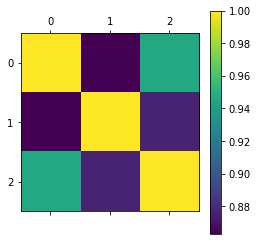

In [56]:
plt.matshow(df.corr())
plt.colorbar()
plt.show()

## Vychýlené hodnoty

Často používaná technika na detekciu vychýlených hodnôt je boxplot diagram. V diagramoch nižšie môžeme vidieť, že v ani jednom z troch miest nie sú vychýlené hodnoty. Rovnaké hodnoty môžeme vidieť na histogramoch vyššie.

#### Los Angeles

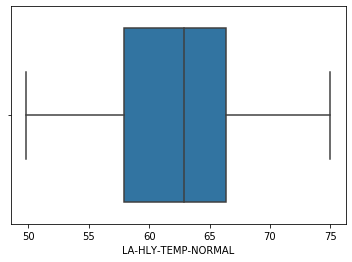

In [57]:
sea.boxplot(x=la)

#### Phoenix

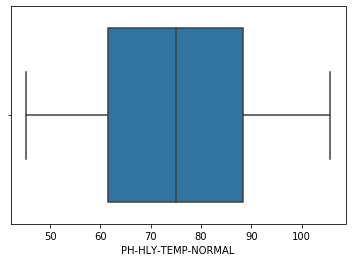

In [58]:
sea.boxplot(x=ph)

#### San Francisco

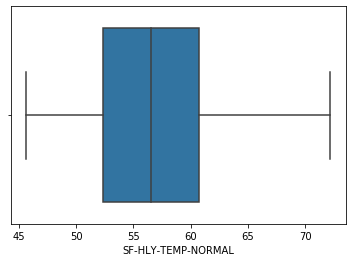

In [59]:
sea.boxplot(x=sf)

# BOD 3 - Záverečná časť

Do záverečnej časti sme sa rozhodli do datasetu pridať ešte údaje zo štvrtého mesta - Las Vegas. Toto mesto svojou geografickou polohou veľmi dobre zapadá medzi ostatné mestá.

In [60]:
las_vegas = pd.read_csv("../data/raw/vegas_hourly.csv")
las_vegas.rename(columns={'HLY-TEMP-NORMAL': 'LV-HLY-TEMP-NORMAL'}, inplace=True)
los_angeles = pd.read_csv("../data/raw/losangeles_hourly.csv")
los_angeles.rename(columns={'HLY-TEMP-NORMAL': 'LA-HLY-TEMP-NORMAL'}, inplace=True)
phoenix = pd.read_csv("../data/raw/phoenix_hourly.csv")
phoenix.rename(columns={'HLY-TEMP-NORMAL': 'PH-HLY-TEMP-NORMAL'}, inplace=True)
san_francisco = pd.read_csv("../data/raw/sanfrancisco_hourly.csv")
san_francisco.rename(columns={'HLY-TEMP-NORMAL': 'SF-HLY-TEMP-NORMAL'}, inplace=True)
temperatures = pd.concat([las_vegas[['DATE','LV-HLY-TEMP-NORMAL']],los_angeles['LA-HLY-TEMP-NORMAL'],phoenix['PH-HLY-TEMP-NORMAL'],san_francisco['SF-HLY-TEMP-NORMAL']],axis=1,sort=False)
temperatures.to_csv('../data/raw/temperatures4.csv',index=False)

#### Mestá
Na mape sú farebne vyznačené mestá, z ktorých pochádzajú vstupné dáta.
![cities](./cities.png)

Počasie v mestách je pod vplyvom Tichého oceánu čo potvrdzuje nasledovná mapa veterných prúdov v oblasti.
![wind](./wind.jpg)

In [61]:
def create_graph(filename, shift):
    graph = pd.read_csv(filename,sep=';')
    plt.plot(graph.loss[shift:], label='loss')
    plt.plot(graph.val_loss[shift:],c ='r', label='val_loss')
    plt.legend(loc='best')
    plt.title("Graf loss funkcií:")
    plt.show()

## Experimenty

Našimi experimentami sme sa postupne snažili nájsť najoptimálnejšiu archhitektúru a nastavenie hyperparametrov na predikovanie teploty v meste Los Angeles. 

Pri každom experimente uvádzame architektúru medelu neurónovej siete, postup pri trénovaní a dosiahnuté výsledky.

V experimentoch 0 - 5 bol model trénovaný na datasete s troma mestami - Los Angeles, San Francisco a Phoenix. Od experimentu 6 sme pridali aj dáta zo štvrtého mesta - Las Vegas.

#### Experiment 0 - baseline

Tento experiment bol použitý pri prvom odovzdaní. Predikovali sme 12 hodín na základe piatich dní. Výsledky tohto experimentu mali približne 98% úspešnosť(mse).

Architektúra:
![arch0](./testy/test0/architektura0.png)

Hyperparametre pri trénovaní:

- Epochs - 15
- Batch size - 200
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

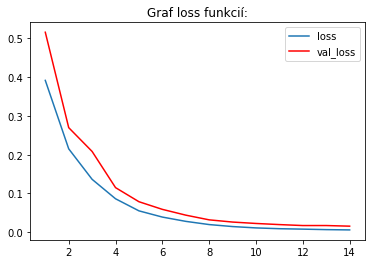

In [62]:
create_graph("./testy/test0/test0.csv", 1)

Výsledky:
![test0](./testy/test0/test0.png)

#### Experiment 1

V tomto experimente sme chceli otestovať či náš model bude schopný predikovať aj dlhšie časové obdobie. Predikovali sme obdobie dvoch dní na základe predchádzajúcich 10 dní. Výsledky tohto experimentu mali približne 99% úspešnosť(mse).

Architektúra:
![arch1](./testy/test1/architektura01.png)

Hyperparametre pri trénovaní:

- Epochs - 15
- Batch size - 200
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

V tomto experimente a aj v experimente 2 sme vyskúšali aktivačnú funkciu Tanh. V oboch prípadoch boli ale výsledky horšie ako v prípade ReLU funkcie.

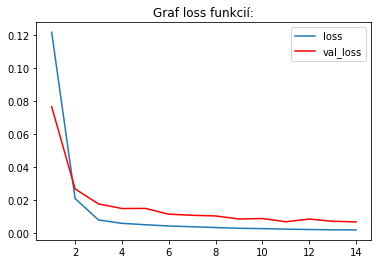

In [63]:
create_graph("./testy/test1/test1.csv", 1)

Výsledky:
![test1](./testy/test1/test1.png)

#### Experiment 2

V tomto experimente sme zmenili architektúru siete a pridali sme jednu LSTM vrstvu medzi existujúce dve vrstvy. Opäť sme predikovali 2 dni na základe 14 dní. Všetky ďalšie experimenty budú predikované na 2 dni na základe posledných 14 dní. Výsledky tohto experimentu mali približne 97% úspešnosť(mse).

Architektúra:
![arch2](./testy/test2/architektura2.png)

Hyperparametre pri trénovaní:

- Epochs - 15
- Batch size - 200
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

    

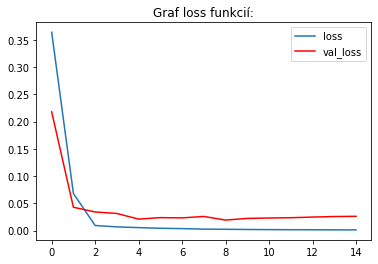

In [64]:
create_graph("./testy/test2/test2.csv", 0)

Výsledky:
![test2](./testy/test2/test2.png)

#### Experiment 3

V tomto experimente sme zachovali arcitektúru modelu Zároveň sme optimalizovali príliš vysoký batch size z 200 na 80. V ďalších experimentov budeme používať tento batch size. Výsledky tohto experimentu mali približne 98% úspešnosť(mse).

Architektúra:
![arch3](./testy/test3/architektura3.png)

Hyperparametre pri trénovaní:

- Epochs - 15
- Batch size - 80
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error


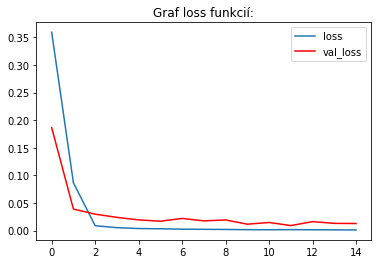

In [65]:
create_graph("./testy/test3/test3.csv", 0)

Výsledky:
![test3](./testy/test3/test3.png)

#### Experiment 4

V tomto experimente sme sa prvý krát rozhodli pre využitie GRU vrstiev. Konkrétne sme využili 2 GRU vrstvy s aktiváciou ReLU. Výsledky tohto experimentu mali približne 99% úspešnosť(mse).

Architektúra:
![arch4](./testy/test4/architektura4.png)

Hyperparametre pri trénovaní:
    
- Epochs - 15
- Batch size - 80
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

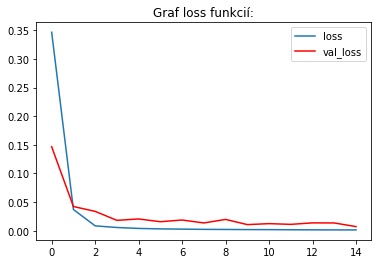

In [66]:
create_graph("./testy/test4/test4.csv", 0)

Výsledky:
![test4](./testy/test4/test4.png)

#### Experiment 5

Do pôvodnej architektúry sme pridali jednu GRU vrstvu navyše. Výsledky tohto experimentu mali približne 98% úspešnosť(mse).

Architektúra:
![arch5](./testy/test5/architektura5.png)

Hyperparametre pri trénovaní:
        
- Epochs - 15
- Batch size - 80
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

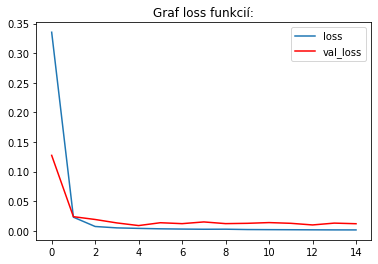

In [67]:
create_graph("./testy/test5/test5.csv", 0)

Výsledky:
![test5](./testy/test5/test5.png)

#### Experiment 6

V tomto experimente sme využili rovnakú architektúru siete ako vo štvrtom experimente. Prvý krát sme ale využili dataset so všetkými štyrmi mestami. Tento dataset budeme používať aj vo všetkých ďalších experimentoch. Výsledky tohto experimentu mali približne 99% úspešnosť(mse).

Architektúra:
![arch6](./testy/test6/architektura6.png)

Hyperparametre pri trénovaní:
    
- Epochs - 15
- Batch size - 80
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

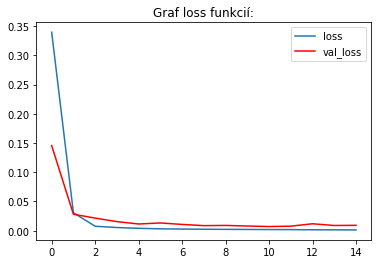

In [68]:
create_graph("./testy/test6/test6.csv", 0)

Výsledky:
![test6](./testy/test6/test6.png)

#### Experiment 7

V siedmom experimente sme vyskúšali už predtým využitú architektúru s dvoma LSTM vrstvami na datasete so štyrmi mestami. Výsledky tohto experimentu mali približne 98% úspešnosť(mse).

Architektúra:
![arch7](./testy/test7/architektura7.png)

Hyperparametre pri trénovaní:
    
- Epochs - 15
- Batch size - 80
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

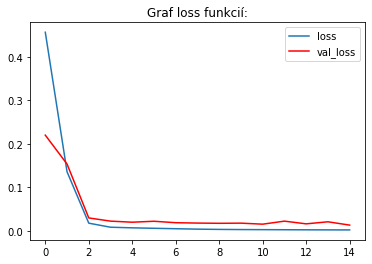

In [69]:
create_graph("./testy/test7/test7.csv", 0)

Výsledky:
![test7](./testy/test7/test7.png)

#### Experiment 8

Do tohto testu sme k dvom LSTM vrsvám pridali opäť ešte jednu lstm vrstvu navyše. Navýšili se aj počet epoch na 20. Výsledky tohto experimentu mali približne 98.6% úspešnosť(mse).

Architektúra:
![arch8](./testy/test8/architektura8.png)

Hyperparametre pri trénovaní:
    
- Epochs - 20
- Batch size - 80
- Activation function - ReLU
- Optimizer - Adam
- Loss function - Mean squared error

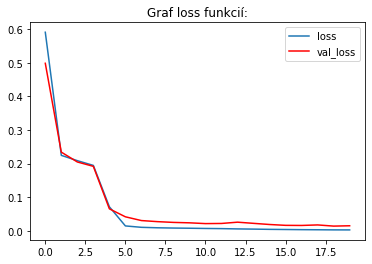

In [70]:
create_graph("./testy/test8/test8.csv", 0)

Výsledky:
![test8](./testy/test8/test8.png)

## Zhodnotenie a záver

V tomto projekte sme sa snažili čo najlepšie predpovedať templotu v meste Los Angeles. Rozhodli sme sa na tento problém využiť rekurentné neurónové siete, do ktorých sme ako vstupné dáta použili teploty zo štyoch miest(Los Angeles, Phoenix, San Francisco a Las Vegas). 

Robili sme viacej experimentov, pri ktorých sme sa snažili nájsť čo najlepšiu architektúru a nastavenie hyperparametrov. Najskôr sme vytvorili takzvaný "base-line" model, ktorým sme dokázali, že rekurentné neurónové siete dokážu riešiť takéto problémy. Tento model aj s výsledkami je bližšie popísaný v kapitole Experiment 0. 

Postupne sme v našich ďalších experimentov zvyšovali počet dní, ktoré sme predikovali. Keďže sme zvyšovali náročnosť problému museli sme mierne upraviť architektúru a hyperparametre, aby sa sieť dokázala dostatočne dobre učiť. Tieto experimenty sú tiež opísané vyššie v dokumente. Vyskúšali sme rôzne nastavenia, v niektorých experimentoch sme pridali miesto troch miest na vstupe štyri, v iných sme zase testovalí iný typ rekurentnej siete(GRU). 

Našimi experimentami sme zistili, že nájsť optimálne riešenie nie je až také jednoduché, a aj keď sa môže zdať, že sieť má veľmi dobré výsledky, je veľmi diskutabilné, či sa dokáže priblížiť k výsledkom meteorológov.